<a href="https://colab.research.google.com/github/Blazer-007/MNIST-GAN/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
BASE_PATH = "/content/drive/My Drive/Deep_Learning /Generative_Adversial_Networks"

In [4]:
cd "/content/drive/My Drive/Deep_Learning /Generative_Adversial_Networks"

/content/drive/My Drive/Deep_Learning /Generative_Adversial_Networks


In [5]:
pwd

'/content/drive/My Drive/Deep_Learning /Generative_Adversial_Networks'

In [6]:
ls

images/  model/


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:

import tensorflow as tf 
print(tf.__version__)


1.15.2


# Import Libraries

In [21]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [22]:
(X_Train,_),(_,_) = mnist.load_data()

In [23]:
print(X_Train.shape)

(60000, 28, 28)


**Data Normalisation**

In [24]:
#Normalize the Data between -1 and 1
X_Train = (X_Train.astype('float32') - 127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


**Some Constants**

In [25]:
TOTAL_EPOCHS = 100
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE) 
HALF_BATCH = 128
NOISE_DIM = 100 # Upsample into 784 Dim Vector
adam = Adam(lr=2e-4,beta_1=0.5)

# Generator Code
- Generates some fake images from a noise vector of 100 dimension
- Input  :- (100,1) Noise Vector
- Output :- (784,1) Image Vector
- Uses Leaky ReLU as activation in Internal Layers
- tanh as activation in Output Layer

In [26]:
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 784)              

# Discriminator Code
- classify the given image into real / fake (1 / 0)
- Input :- (784 * 1 dim) Image Vector
- Output :- (1 * 1 dim) Real / Fake
- Uses Leaky ReLU as activation in Internal Layers
- Sigmoid as activation in Output Layer

In [27]:
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


# GAN Model

In [28]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

**Some Additional Functions**

In [29]:
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

**Reshaping the Input**

In [30]:
X_Train = X_Train.reshape(-1,784)
print(X_Train.shape)

(60000, 784)


# Training Loop
1. Generate a Mini Batch from Generator using Noise-Prior (Ground Truth - 0)
2. Select a Mini Batch form Real Training Data (Ground Truth - 1)
3. Train only Discriminator on both batches separately
    - Consider Generator as Frozen
    
4. Train G using random noise as input and 1 as ground truth for all examples
    - Consider Discriminator as Frozen

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc Loss 0.6421 Generator Loss 0.9620
Epoch 2 Disc Loss 0.6442 Generator Loss 1.0349
Epoch 3 Disc Loss 0.6304 Generator Loss 1.1092
Epoch 4 Disc Loss 0.6084 Generator Loss 1.2272
Epoch 5 Disc Loss 0.5915 Generator Loss 1.2638


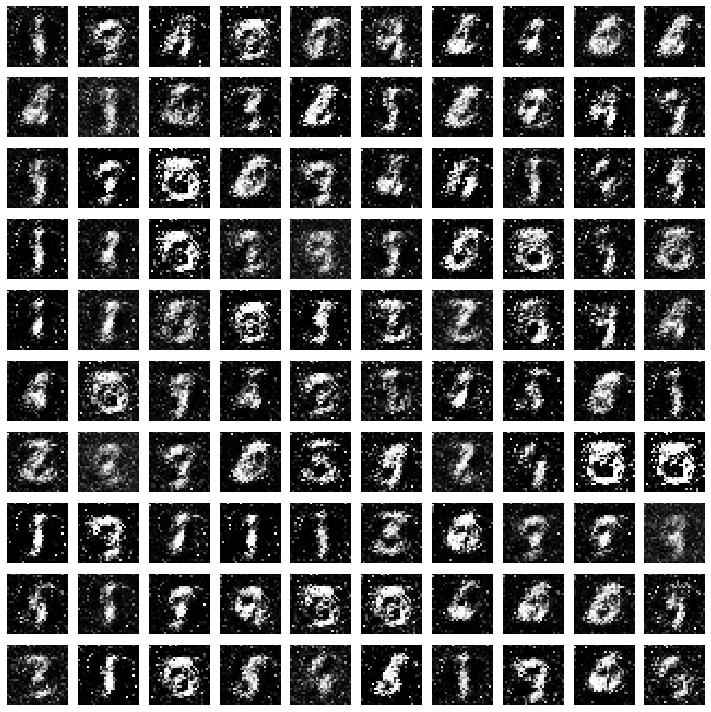

Epoch 6 Disc Loss 0.5644 Generator Loss 1.3864
Epoch 7 Disc Loss 0.5448 Generator Loss 1.4565
Epoch 8 Disc Loss 0.5621 Generator Loss 1.3468
Epoch 9 Disc Loss 0.6018 Generator Loss 1.2269
Epoch 10 Disc Loss 0.6326 Generator Loss 1.0983


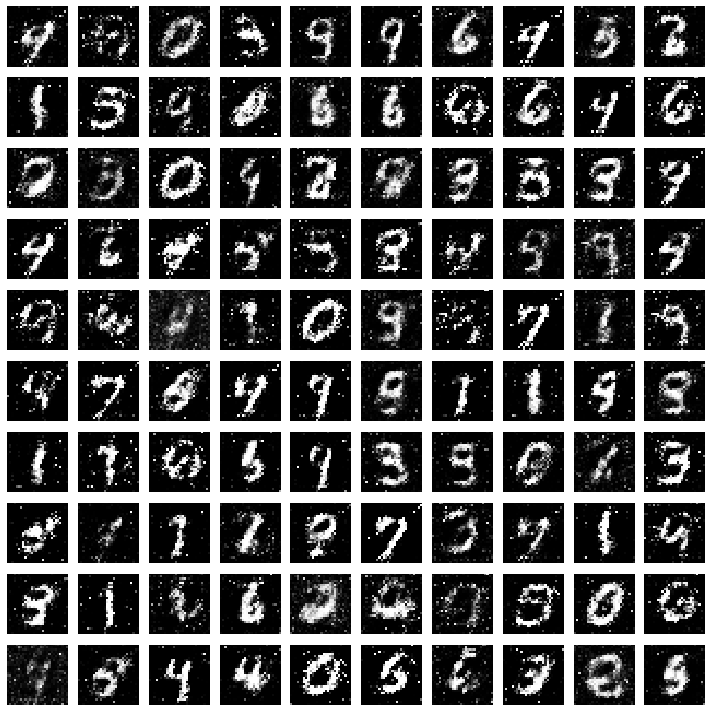

Epoch 11 Disc Loss 0.6413 Generator Loss 1.0513
Epoch 12 Disc Loss 0.6364 Generator Loss 1.0685
Epoch 13 Disc Loss 0.6334 Generator Loss 1.0678
Epoch 14 Disc Loss 0.6317 Generator Loss 1.0629
Epoch 15 Disc Loss 0.6359 Generator Loss 1.0528


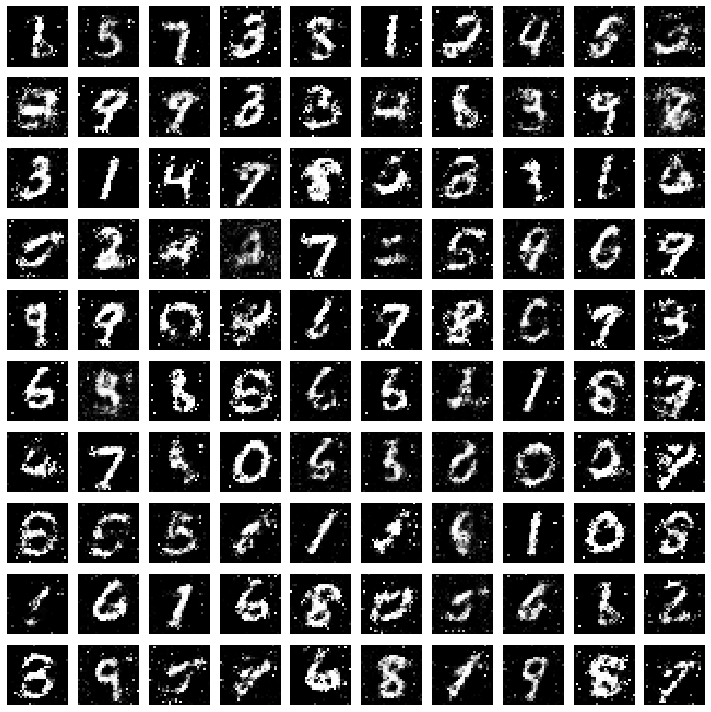

Epoch 16 Disc Loss 0.6364 Generator Loss 1.0481
Epoch 17 Disc Loss 0.6354 Generator Loss 1.0562
Epoch 18 Disc Loss 0.6372 Generator Loss 1.0575
Epoch 19 Disc Loss 0.6382 Generator Loss 1.0450
Epoch 20 Disc Loss 0.6408 Generator Loss 1.0487


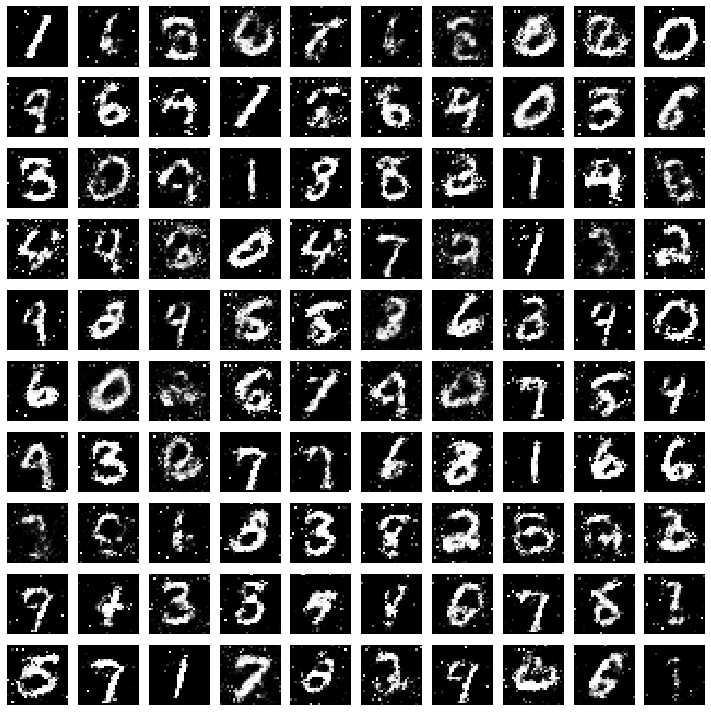

Epoch 21 Disc Loss 0.6406 Generator Loss 1.0507
Epoch 22 Disc Loss 0.6442 Generator Loss 1.0376
Epoch 23 Disc Loss 0.6482 Generator Loss 1.0292
Epoch 24 Disc Loss 0.6511 Generator Loss 1.0170
Epoch 25 Disc Loss 0.6549 Generator Loss 1.0158


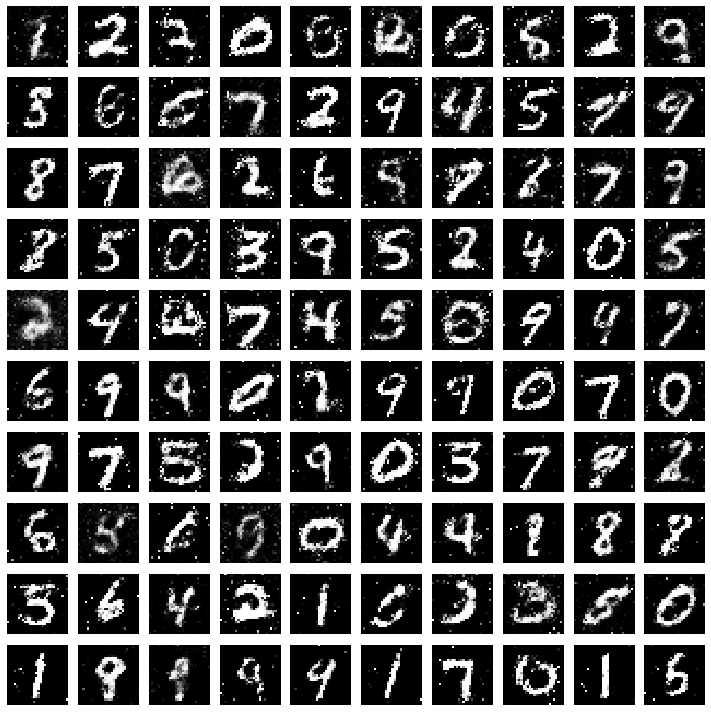

Epoch 26 Disc Loss 0.6549 Generator Loss 1.0156
Epoch 27 Disc Loss 0.6565 Generator Loss 1.0103
Epoch 28 Disc Loss 0.6590 Generator Loss 1.0037
Epoch 29 Disc Loss 0.6602 Generator Loss 0.9999
Epoch 30 Disc Loss 0.6615 Generator Loss 1.0031


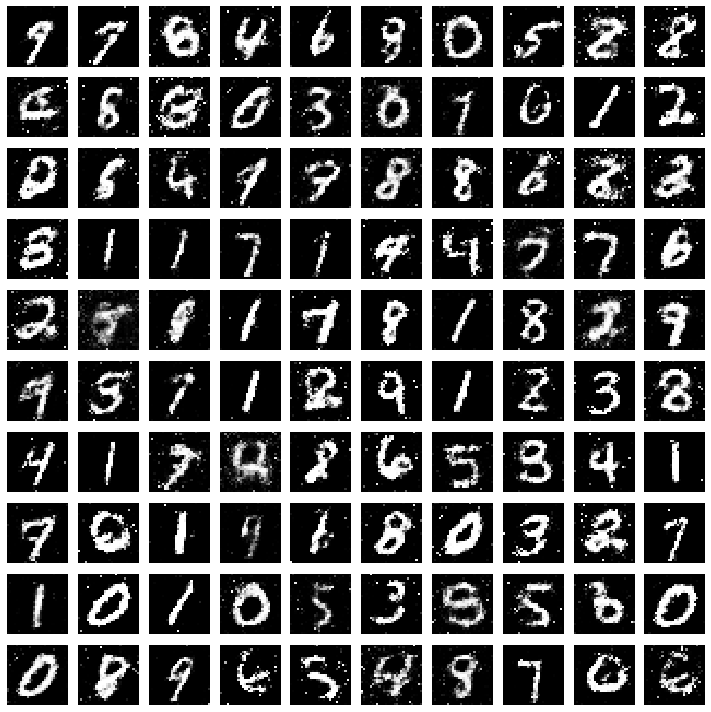

Epoch 31 Disc Loss 0.6607 Generator Loss 1.0041
Epoch 32 Disc Loss 0.6607 Generator Loss 1.0073
Epoch 33 Disc Loss 0.6622 Generator Loss 0.9939
Epoch 34 Disc Loss 0.6618 Generator Loss 0.9964
Epoch 35 Disc Loss 0.6629 Generator Loss 0.9988


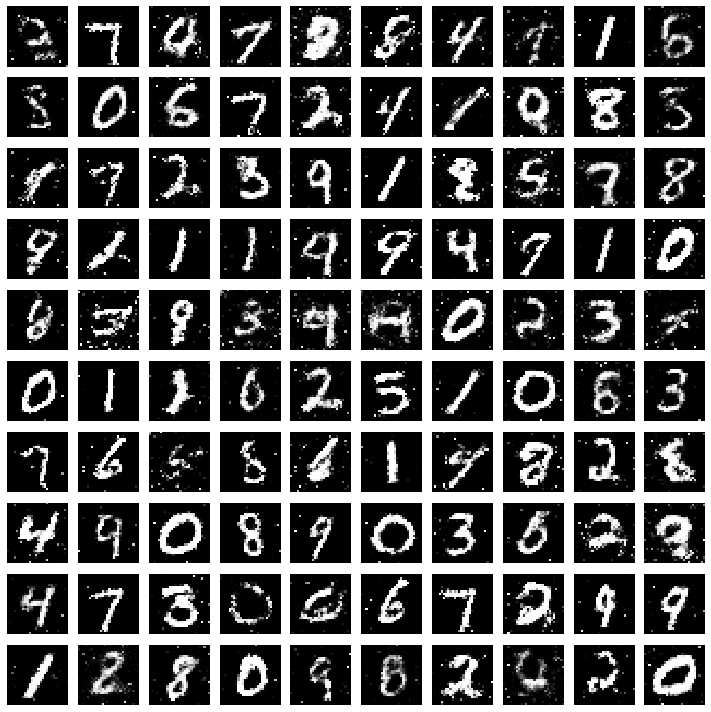

Epoch 36 Disc Loss 0.6602 Generator Loss 0.9991
Epoch 37 Disc Loss 0.6607 Generator Loss 0.9998
Epoch 38 Disc Loss 0.6613 Generator Loss 1.0026
Epoch 39 Disc Loss 0.6624 Generator Loss 0.9939
Epoch 40 Disc Loss 0.6609 Generator Loss 1.0001


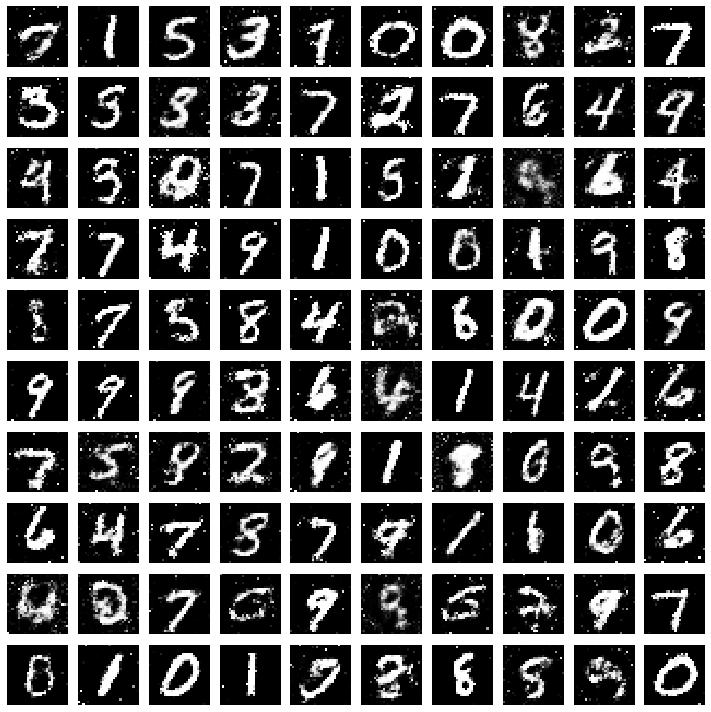

Epoch 41 Disc Loss 0.6620 Generator Loss 1.0002
Epoch 42 Disc Loss 0.6631 Generator Loss 0.9981
Epoch 43 Disc Loss 0.6637 Generator Loss 0.9904
Epoch 44 Disc Loss 0.6621 Generator Loss 1.0019
Epoch 45 Disc Loss 0.6599 Generator Loss 1.0002


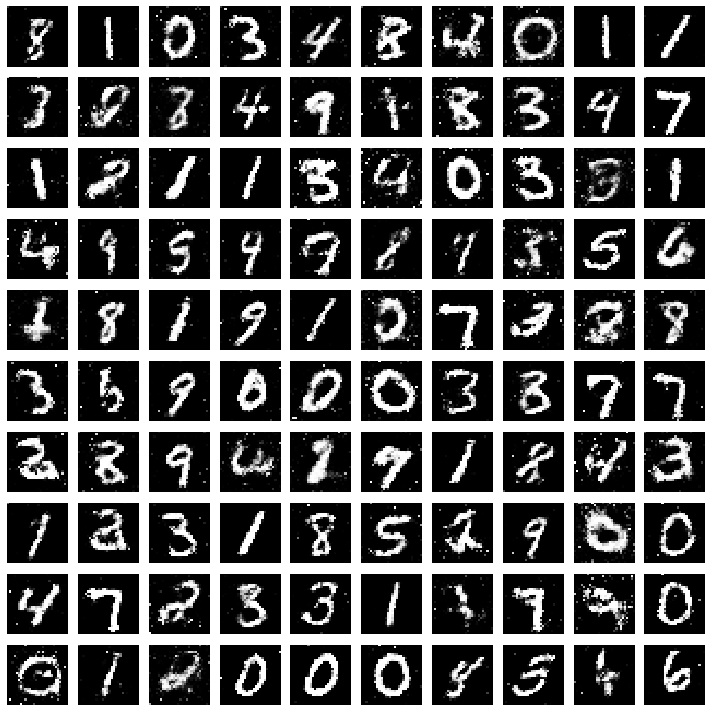

Epoch 46 Disc Loss 0.6614 Generator Loss 0.9961
Epoch 47 Disc Loss 0.6623 Generator Loss 0.9967
Epoch 48 Disc Loss 0.6626 Generator Loss 0.9903
Epoch 49 Disc Loss 0.6634 Generator Loss 0.9916
Epoch 50 Disc Loss 0.6634 Generator Loss 0.9995


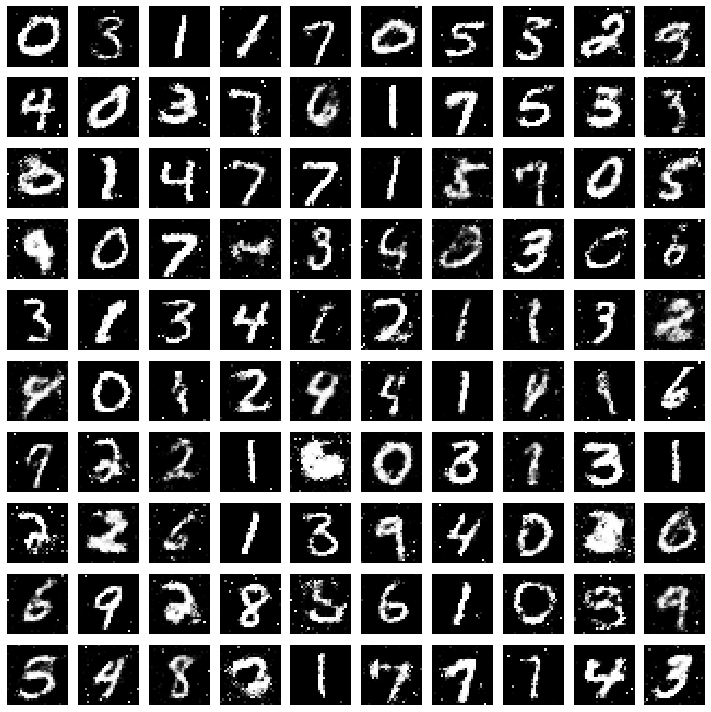

Epoch 51 Disc Loss 0.6629 Generator Loss 0.9993
Epoch 52 Disc Loss 0.6647 Generator Loss 0.9935
Epoch 53 Disc Loss 0.6652 Generator Loss 0.9924
Epoch 54 Disc Loss 0.6659 Generator Loss 0.9916
Epoch 55 Disc Loss 0.6635 Generator Loss 0.9978


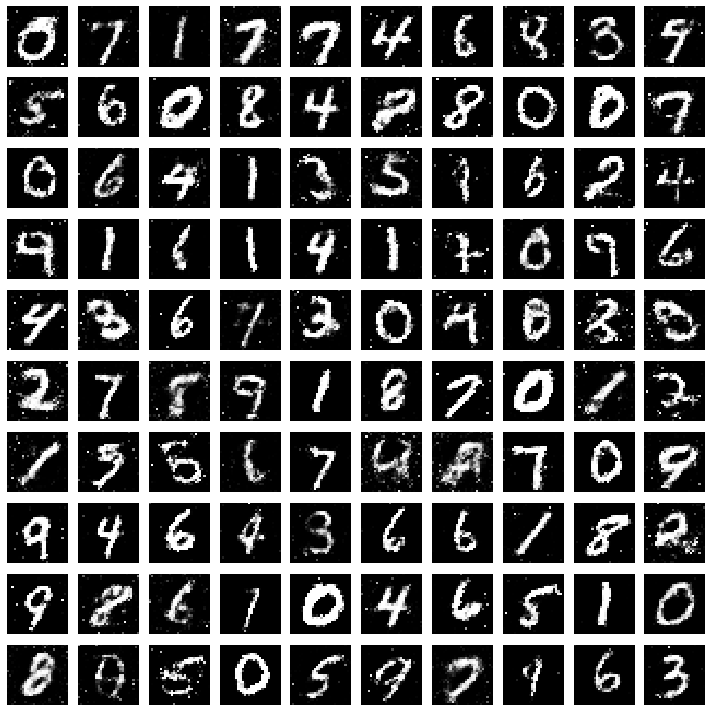

Epoch 56 Disc Loss 0.6650 Generator Loss 0.9918
Epoch 57 Disc Loss 0.6670 Generator Loss 0.9911
Epoch 58 Disc Loss 0.6656 Generator Loss 0.9919
Epoch 59 Disc Loss 0.6645 Generator Loss 0.9915
Epoch 60 Disc Loss 0.6661 Generator Loss 0.9868


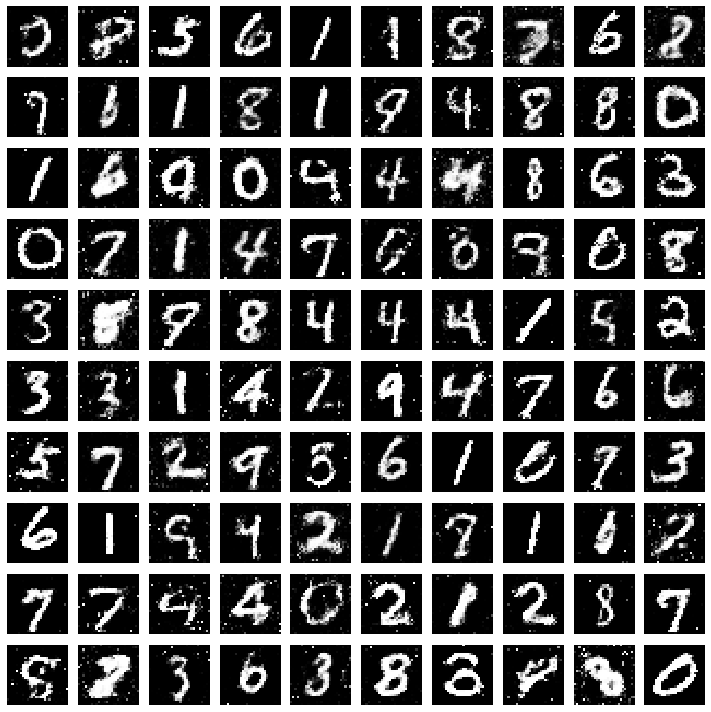

Epoch 61 Disc Loss 0.6652 Generator Loss 0.9873
Epoch 62 Disc Loss 0.6646 Generator Loss 0.9936
Epoch 63 Disc Loss 0.6649 Generator Loss 0.9906
Epoch 64 Disc Loss 0.6653 Generator Loss 0.9901
Epoch 65 Disc Loss 0.6642 Generator Loss 0.9972


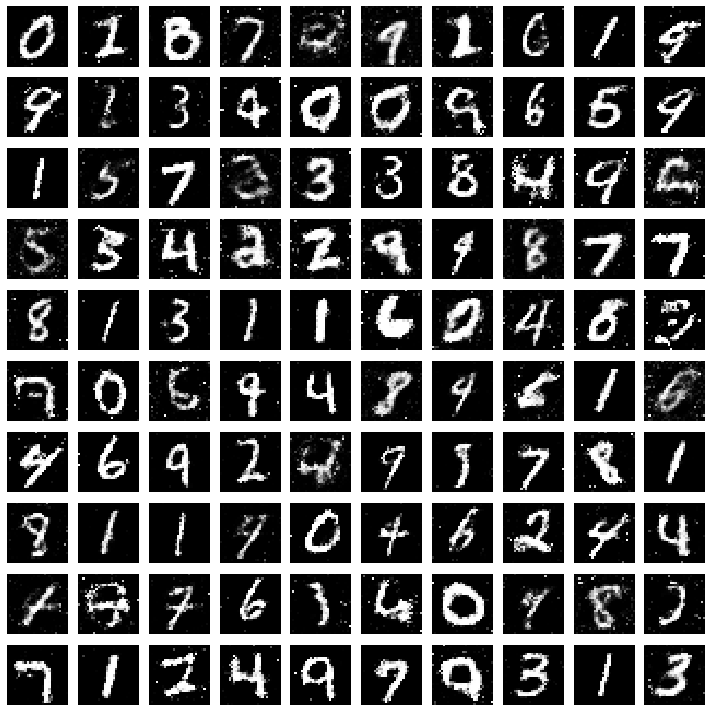

Epoch 66 Disc Loss 0.6649 Generator Loss 0.9863
Epoch 67 Disc Loss 0.6656 Generator Loss 0.9956
Epoch 68 Disc Loss 0.6656 Generator Loss 0.9894
Epoch 69 Disc Loss 0.6648 Generator Loss 0.9901
Epoch 70 Disc Loss 0.6648 Generator Loss 0.9879


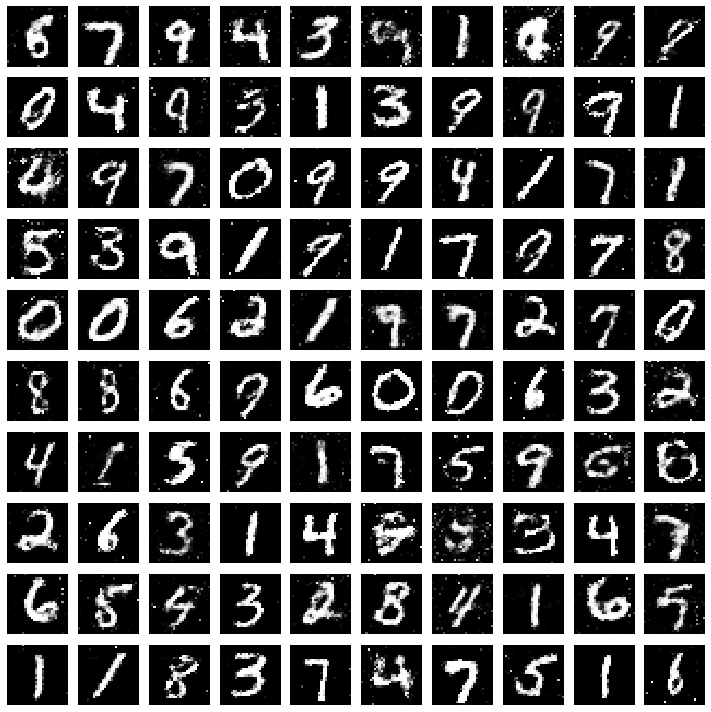

Epoch 71 Disc Loss 0.6659 Generator Loss 0.9910
Epoch 72 Disc Loss 0.6637 Generator Loss 0.9914
Epoch 73 Disc Loss 0.6647 Generator Loss 0.9868
Epoch 74 Disc Loss 0.6646 Generator Loss 0.9905
Epoch 75 Disc Loss 0.6640 Generator Loss 1.0003


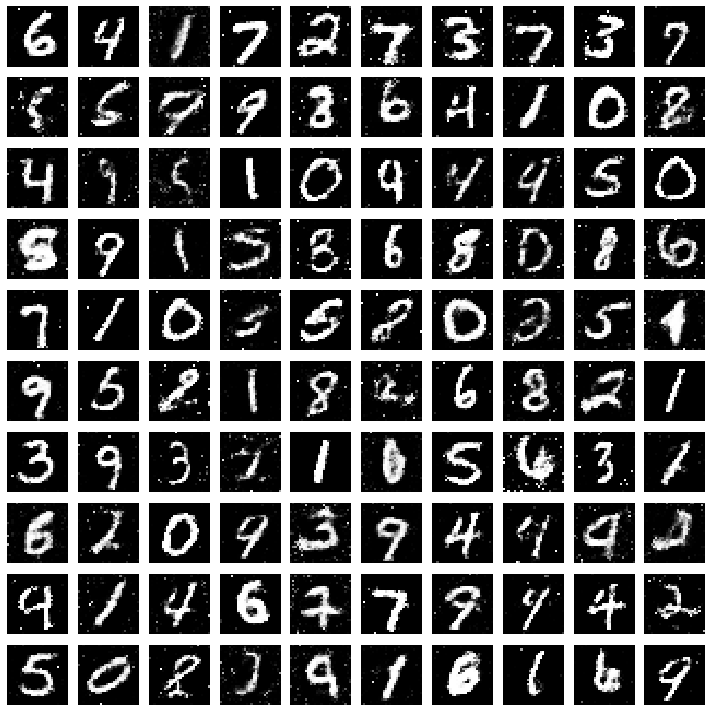

Epoch 76 Disc Loss 0.6638 Generator Loss 0.9938
Epoch 77 Disc Loss 0.6628 Generator Loss 0.9981
Epoch 78 Disc Loss 0.6633 Generator Loss 0.9957
Epoch 79 Disc Loss 0.6641 Generator Loss 0.9877
Epoch 80 Disc Loss 0.6636 Generator Loss 0.9962


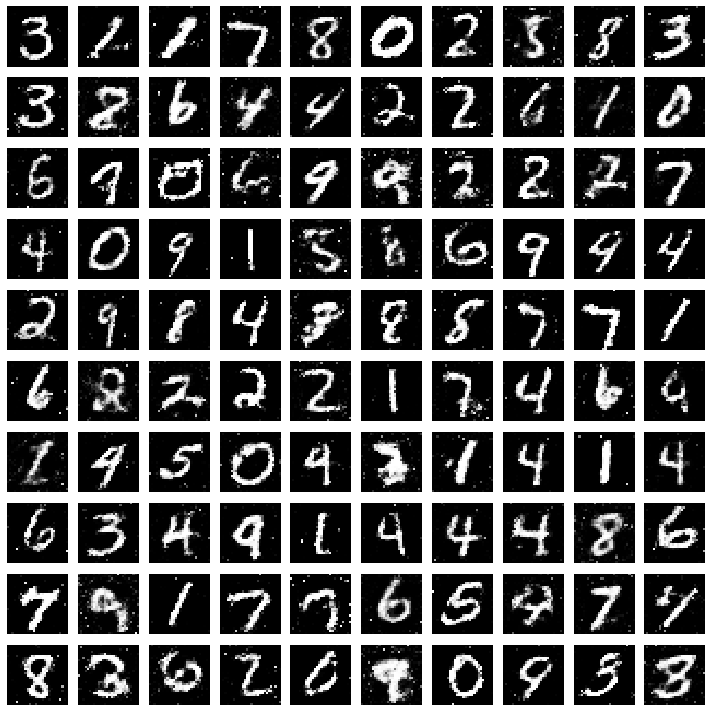

Epoch 81 Disc Loss 0.6642 Generator Loss 0.9929
Epoch 82 Disc Loss 0.6635 Generator Loss 0.9913
Epoch 83 Disc Loss 0.6630 Generator Loss 0.9944
Epoch 84 Disc Loss 0.6627 Generator Loss 0.9904
Epoch 85 Disc Loss 0.6639 Generator Loss 0.9915


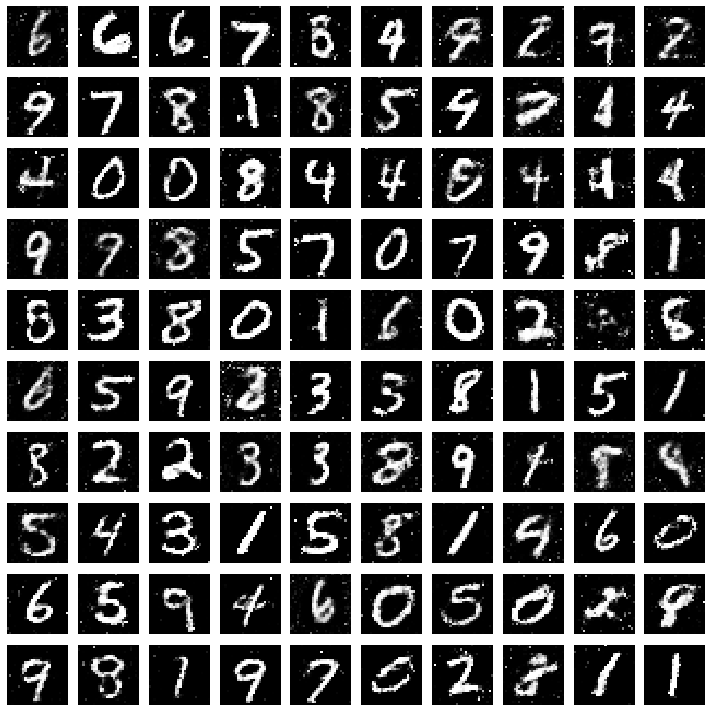

Epoch 86 Disc Loss 0.6631 Generator Loss 0.9879
Epoch 87 Disc Loss 0.6633 Generator Loss 0.9944
Epoch 88 Disc Loss 0.6623 Generator Loss 0.9946
Epoch 89 Disc Loss 0.6637 Generator Loss 0.9979
Epoch 90 Disc Loss 0.6631 Generator Loss 0.9956


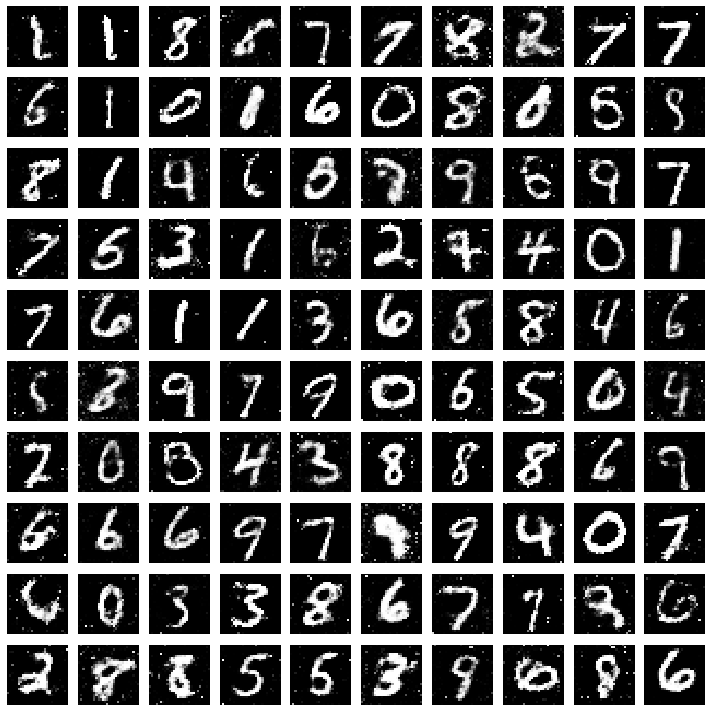

Epoch 91 Disc Loss 0.6621 Generator Loss 1.0013
Epoch 92 Disc Loss 0.6631 Generator Loss 0.9944
Epoch 93 Disc Loss 0.6606 Generator Loss 0.9990
Epoch 94 Disc Loss 0.6605 Generator Loss 0.9992
Epoch 95 Disc Loss 0.6618 Generator Loss 0.9989


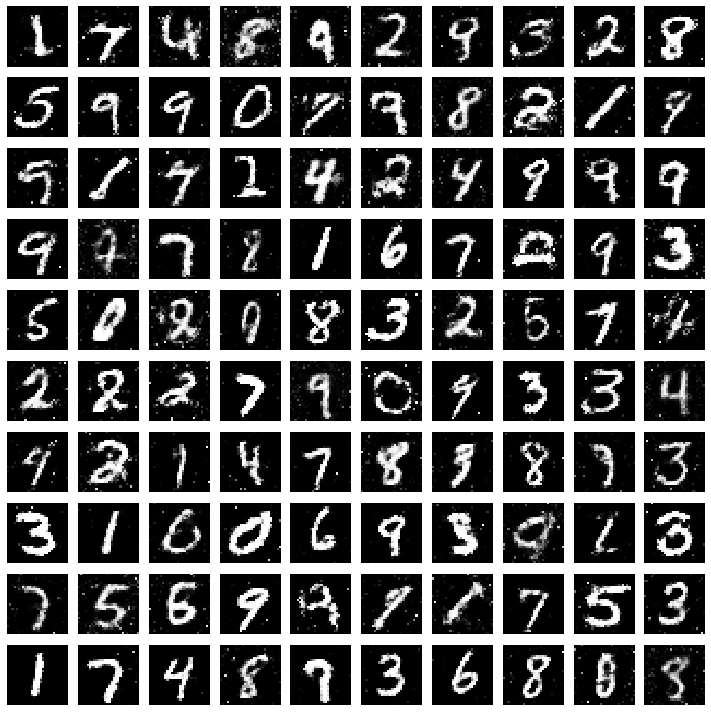

Epoch 96 Disc Loss 0.6603 Generator Loss 1.0041
Epoch 97 Disc Loss 0.6609 Generator Loss 0.9938
Epoch 98 Disc Loss 0.6593 Generator Loss 0.9950
Epoch 99 Disc Loss 0.6598 Generator Loss 1.0018
Epoch 100 Disc Loss 0.6599 Generator Loss 0.9996


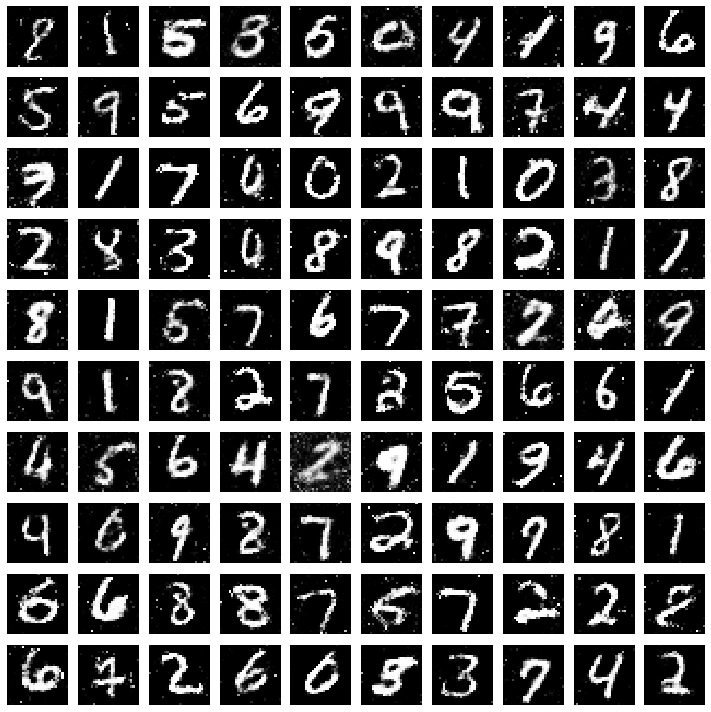

In [31]:
d_losses = []
g_losses = []


for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    #Mini Batch SGD
    for step in range(NO_OF_BATCHES):
        
        # Step-1 Discriminator 
        # 50% Real Data + 50% Fake Data
        
        #Real Data X
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
        real_imgs = X_Train[idx]
        
        #Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise) #Forward 
        
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))

        # Train our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5==0:
        generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)

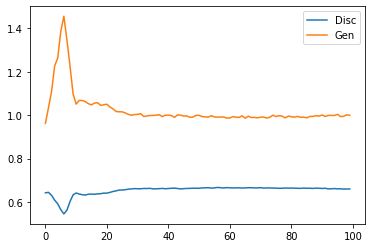

In [32]:
plt.plot(d_losses,label="Disc")
plt.plot(g_losses,label="Gen")
plt.legend()
plt.show()